<a href="https://colab.research.google.com/github/nafisamukhtar/Genome_Analysis/blob/main/Genome_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#datasets : 
#COVID 19 - https://www.ncbi.nlm.nih.gov/nuccore/NC_045512.2?report=fasta
#SARS - https://www.ncbi.nlm.nih.gov/nuccore/NC_004718.3?report=fasta
#MERS - https://www.ncbi.nlm.nih.gov/nuccore/NC_019843.3?report=fasta

In [ ]:
#1
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#2
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
#3
downloaded = drive.CreateFile({'id':'1Ch3Lj77q-KjaVrfhkIrxCSXMyuikxTN7'}) # replace the id with id of file you want to access
downloaded.GetContentFile('COVV.fasta') 


In [ ]:
#4
!pip install biopython
!pip install Squiggle

In [ ]:
#5
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [ ]:
#6
from Bio import SeqIO
for sequence in SeqIO.parse('COVV.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTGTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTACACGGAACGTTCT

In [ ]:
#7
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
DNAsequence = SeqIO.read('COVV.fasta', "fasta")
print(DNAsequence)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [ ]:
#8
DNA = DNAsequence.seq #Convert DNA into mRNA Sequence
mRNA = DNA.transcribe() #Transcribe a DNA sequence into RNA.
print(mRNA)
print('Size : ',len(mRNA))

AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGUAGAUCUGUUCUCUAAACGAACUUUAAAAUCUGUGUGGCUGUCACUCGGCUGCAUGCUUAGUGCACUCACGCAGUAUAAUUAAUAACUAAUUACUGUCGUUGACAGGACACGAGUAACUCGUCUAUCUUCUGCAGGCUGCUUACGGUUUCGUCCGUGUUGCAGCCGAUCAUCAGCACAUCUAGGUUUCGUCCGGGUGUGACCGAAAGGUAAGAUGGAGAGCCUUGUCCCUGGUUUCAACGAGAAAACACACGUCCAACUCAGUUUGCCUGUUUUACAGGUUCGCGACGUGCUCGUACGUGGCUUUGGAGACUCCGUGGAGGAGGUCUUAUCAGAGGCACGUCAACAUCUUAAAGAUGGCACUUGUGGCUUAGUAGAAGUUGAAAAAGGCGUUUUGCCUCAACUUGAACAGCCCUAUGUGUUCAUCAAACGUUCGGAUGCUCGAACUGCACCUCAUGGUCAUGUUAUGGUUGAGCUGGUAGCAGAACUCGAAGGCAUUCAGUACGGUCGUAGUGGUGAGACACUUGGUGUCCUUGUCCCUCAUGUGGGCGAAAUACCAGUGGCUUACCGCAAGGUUCUUCUUCGUAAGAACGGUAAUAAAGGAGCUGGUGGCCAUAGUUACGGCGCCGAUCUAAAGUCAUUUGACUUAGGCGACGAGCUUGGCACUGAUCCUUAUGAAGAUUUUCAAGAAAACUGGAACACUAAACAUAGCAGUGGUGUUACCCGUGAACUCAUGCGUGAGCUUAACGGAGGGGCAUACACUCGCUAUGUCGAUAACAACUUCUGUGGCCCUGAUGGCUACCCUCUUGAGUGCAUUAAAGACCUUCUAGCACGUGCUGGUAAAGCUUCAUGCACUUUGUCCGAACAACUGGACUUUAUUGACACUAAGAGGGGUGUAUACUGCUGCCGUGAACAUGAGCAUGAAAUUGCUUGGUACACGGAACGUUCU

In [ ]:
#9
#Identifying the amino acids
#Identifying protein length
#Identifying mrna length
Amino_Acid = mRNA.translate(table=1, cds=False)
print('Amino Acid', Amino_Acid)
print("Length of Protein:",len(Amino_Acid))
print("Length of Original mRNA:",len(mRNA))

Amino Acid IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QDTSNSSIFCRLLTVSSVLQPIISTSRFRPGVTER*DGEPCPWFQRENTRPTQFACFTGSRRARTWLWRLRGGGLIRGTSTS*RWHLWLSRS*KRRFAST*TALCVHQTFGCSNCTSWSCYG*AGSRTRRHSVRS*W*DTWCPCPSCGRNTSGLPQGSSS*ER**RSWWP*LRRRSKVI*LRRRAWH*SL*RFSRKLEH*T*QWCYP*THA*A*RRGIHSLCR*QLLWP*WLPS*VH*RPSSTCW*SFMHFVRTTGLY*H*EGCILLP*T*A*NCLVHGTF*KEL*IADTF*N*IGKEI*HLQWGMSKFCISLKFHNQDYSTKG*KEKA*WLYG*NSICLSSCVTK*MQPNVPFNSHEV*SLW*NFMADGRFC*SHLRILWH*EFD*RRCHYLWLLTPKCCC*NLLSSMSQFRSRT*A*SCRIP**IWLENHSS*GWSHYCLWRLCVLLCWLP*QVCLLGSTC*R*HRL*PYRCCWRRFRRS**QPS*NTPKRESQHQYCW*L*T**RDRHYFGIFFCFHKCFCGNCERFGL*SIQTNC*ILW*F*SYKRKS*KRCLEYW*TEINTESSLCICIRGCSCCTINFLPHS*NCSKFCACFTEGRYNNTRWNFTVFTETH*CYDVHI*FGY*QSSCNGLHYRWCCSVDFAVAN*HLWHCL*KTQTRP*LA*REV*GRCRVS*RRLGNC*IYLNLCL*NCRWTNCHLCKGN*GECSDIL*ACK*IFGFVC*LYHYWWS*T*SLEFR*NICHALKGIVQKVC*IQRRNWPTHASKSPKRNYLLRGRNTSHRSVNRGSCLENW*FTTIRTTY**SC*SSIGWYTSLY*RAYVARNQRHRKVLCPCT*YDGNKQYLHTQRRCTNKGYFW**HCDRSARLQECEYHF*T**KD**ST**EVLCLYS*TRYRSK*VRLCCGRCCHKNFATSI*ITYTTGH*FR*VE

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#10
#printig standard codon table
from Bio.Data import CodonTable
print(CodonTable.unambiguous_rna_by_name['Standard'])

Table 1 Standard, SGC0

  |  U      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
U | UUU F   | UCU S   | UAU Y   | UGU C   | U
U | UUC F   | UCC S   | UAC Y   | UGC C   | C
U | UUA L   | UCA S   | UAA Stop| UGA Stop| A
U | UUG L(s)| UCG S   | UAG Stop| UGG W   | G
--+---------+---------+---------+---------+--
C | CUU L   | CCU P   | CAU H   | CGU R   | U
C | CUC L   | CCC P   | CAC H   | CGC R   | C
C | CUA L   | CCA P   | CAA Q   | CGA R   | A
C | CUG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | AUU I   | ACU T   | AAU N   | AGU S   | U
A | AUC I   | ACC T   | AAC N   | AGC S   | C
A | AUA I   | ACA T   | AAA K   | AGA R   | A
A | AUG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GUU V   | GCU A   | GAU D   | GGU G   | U
G | GUC V   | GCC A   | GAC D   | GGC G   | C
G | GUA V   | GCA A   | GAA E   | GGA G   | A
G | GUG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [ ]:
#11
#Identify all the Proteins (chains of amino acids)
#identifying functional proteins
Proteins = Amino_Acid.split('*') # * is translated stop codon
df = pd.DataFrame(Proteins)
df.describe()
print('Total proteins:', len(df))
def conv(item):
    return len(item)
def to_str(item):
    return str(item)
df['sequence_str'] = df[0].apply(to_str)
df['length'] = df[0].apply(conv)
df.rename(columns={0: "sequence"}, inplace=True)
df.head()# Take only longer than 20
functional_proteins = df.loc[df['length'] >= 20]
print('Total functional proteins:', len(functional_proteins))
functional_proteins.describe()

Total proteins: 775
Total functional proteins: 80


,length
count,80.000000
mean,67.262500
std,299.955767
min,20.000000
25%,22.000000
50%,25.000000
75%,36.000000
max,2701.000000


In [ ]:
#12
#identifying protein of interest,percentage of amino acids,molecular weight,aromaticity,flexibilty,isoelectric point,secondary structure fraction
from __future__ import division
poi_list = []
MW_list=[]
from Bio.SeqUtils import ProtParam
for record in Proteins[:5]:
    print("\n")
    X = ProtParam.ProteinAnalysis(str(record))
    POI = X.count_amino_acids()
    print(POI)
    poi_list.append(POI)
    MW = X.molecular_weight()
    MW_list.append(MW)
    print("Protein of Interest = ", POI)
    poi_list.append(POI)
    print("poi_list = ",poi_list)
    print("Amino acids percent =    ",str(X.get_amino_acids_percent()))
    print("Molecular weight = ", MW_list)
    print("Aromaticity = ", X.aromaticity())
    print("Flexibility = ", X.flexibility())
    print("Isoelectric point = ", X.isoelectric_point())
    print("Secondary structure fraction = ",X.secondary_structure_fraction())





In [ ]:
#13
from collections import Counter

In [ ]:
#14
covid=SeqIO.read("COVV.fasta",'fasta')

In [ ]:
#15
print(covid)

ID: NC_045512.2
Name: NC_045512.2
Description: NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome
Number of features: 0
Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet())


In [ ]:
#16
# Convert or Get the sequences
covid_seq = covid.seq

In [ ]:
#17
# Check the length of each sequence
print("covid_seq ::",len(covid_seq))

covid_seq :: 29903


In [ ]:
#18
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC


In [ ]:
#19
# Check the length of each sequence
print("GC content of covid_seq ::",GC(covid_seq))


GC content of covid_seq :: 37.97277865097148


In [ ]:
#20
covid_protein = covid_seq.translate()


/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
#21
print("covid_protein ::",len(covid_protein))

covid_protein :: 9967


In [ ]:
#22
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
#23
covid_analysed = ProteinAnalysis(str(covid_protein))

In [ ]:
#24
# Check for the Frequence of AA
covid_analysed.count_amino_acids()

{'A': 375,
 'C': 635,
 'D': 290,
 'E': 270,
 'F': 593,
 'G': 394,
 'H': 332,
 'I': 436,
 'K': 413,
 'L': 886,
 'M': 117,
 'N': 472,
 'P': 292,
 'Q': 325,
 'R': 558,
 'S': 810,
 'T': 679,
 'V': 548,
 'W': 263,
 'Y': 505}

In [ ]:
#25
#descinding order of frequency of proteins
covid_freq = Counter(covid_protein)

In [ ]:
#26
print(covid_freq)

Counter({'L': 886, 'S': 810, '*': 774, 'T': 679, 'C': 635, 'F': 593, 'R': 558, 'V': 548, 'Y': 505, 'N': 472, 'I': 436, 'K': 413, 'G': 394, 'A': 375, 'H': 332, 'Q': 325, 'P': 292, 'D': 290, 'E': 270, 'W': 263, 'M': 117})


In [ ]:
#27
#most repeated proteins
Counter(covid_protein).most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

<BarContainer object of 21 artists>

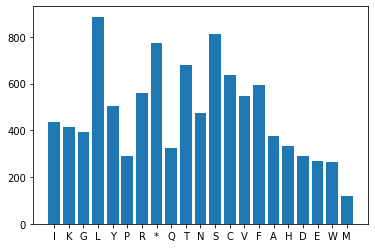

In [ ]:
#28
# Plot the Amino Acids against number of occurences
plt.bar(covid_freq.keys(), covid_freq.values())

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
down=drive.CreateFile({'id':'1b7Dx0MPcuwqafyft1kLxKxDeI1U8ETQk'}) # replace the id with id of file you want to access
down.GetContentFile('MERSSS.fasta') 


In [ ]:
from Bio import SeqIO
for sequence in SeqIO.parse('MERSSS.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTTTGATTTTAACGAACTTAAATAAAAGCCCTGTTGTTTAGCGTATCGTTGCACTTGTCTGGTGGGATTGTGGCATTAATTTGCCTGCTCATCTAGGCAGTGGACATATGCTCAACACTGGGTATAATTCTAATTGAATACTATTTTTCAGTTAGAGCGTCGTGTCTCTTGTACGTCTCGGTCACAATACACGGTTTCGTCCGGTGCGTGGCAATTCGGGGCACATCATGTCTTTCGTGGCTGGTGTGACCGCGCAAGGTGCGCGCGGTACGTATCGAGCAGCGCTCAACTCTGAAAAACATCAAGACCATGTGTCTCTAACTGTGCCACTCTGTGGTTCAGGAAACCTGGTTGAAAAACTTTCACCATGGTTCATGGATGGCGAAAATGCCTATGAAGTGGTGAAGGCCATGTTACTTAAAAAGGAGCCACTTCTCTATGTGCCCATCCGGCTGGCTGGACACACTAGACACCTCCCAGGTCCTCGTGTGTACCTGGTTGAGAGGCTCATTGCTTGTGAAAATCCATTCATGGTTAACCAATTGGCTTATAGCTCTAGTGCAAATGGCAGCCTGGTTGGCACAACTTTGCAGGGCAAGCCTATTGGTATGTTCTTCCCTTATGACATCGAACTTGTCACAGGAAAGCAAAATATTCTCCTGCGCAAGTATGGCCGTGGTGGTTATCACTACACCCCATTCCACTATGAGCGAGACAACACCTCTTGCCCTGAGTGGATGGACGATTTTGAGGCGGATCCTAAAGGCAAATATGCCCAGAATCTGCTTAAGAAGTTGATTGGCGGTGATGTCACTCCAGTTGACCAATACATGTGTGGCGTTGATGGAAAACCCATTAGTGCCTACGCATTTTTAATGGCCAAGGATGGAATAACCAAACTGGCTGATGTTGAAGCGGACGTCGCAGCACGTGCTGATGACGAAGGCTT

In [ ]:
mers = SeqIO.read("MERSSS.fasta","fasta")

In [ ]:
print(mers)

ID: NC_019843.3
Name: NC_019843.3
Description: NC_019843.3 Middle East respiratory syndrome coronavirus, complete genome
Number of features: 0
Seq('GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGAACTT...AAA', SingleLetterAlphabet())


In [ ]:
mers_seq = mers.seq

In [ ]:
print("mers_seq ::",len(mers_seq))

mers_seq :: 30119


In [ ]:
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC

In [ ]:
print("GC content of mers_seq ::",GC(mers_seq))

GC content of mers_seq :: 41.23642883229855


In [ ]:
mers_protein = mers_seq.translate()

/usr/local/lib/python3.6/dist-packages/Bio/Seq.py:2742: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [ ]:
print("mers_protein ::",len(mers_protein))

mers_protein :: 10039


In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
mers_analysed = ProteinAnalysis(str(mers_protein))

In [ ]:
mers_analysed.count_amino_acids()

{'A': 418,
 'C': 506,
 'D': 121,
 'E': 157,
 'F': 453,
 'G': 293,
 'H': 338,
 'I': 565,
 'K': 345,
 'L': 1711,
 'M': 299,
 'N': 285,
 'P': 384,
 'Q': 337,
 'R': 520,
 'S': 852,
 'T': 564,
 'V': 651,
 'W': 203,
 'Y': 348}

In [ ]:
# What the freq of Amino Acids
from collections import Counter

In [ ]:
mers_freq = Counter(mers_protein)

In [ ]:
print(mers_freq)

Counter({'L': 1711, 'S': 852, '*': 689, 'V': 651, 'I': 565, 'T': 564, 'R': 520, 'C': 506, 'F': 453, 'A': 418, 'P': 384, 'Y': 348, 'K': 345, 'H': 338, 'Q': 337, 'M': 299, 'G': 293, 'N': 285, 'W': 203, 'E': 157, 'D': 121})


In [ ]:

# Most common amino acid in Covid
Counter(mers_protein).most_common(10)

[('L', 1711),
 ('S', 852),
 ('*', 689),
 ('V', 651),
 ('I', 565),
 ('T', 564),
 ('R', 520),
 ('C', 506),
 ('F', 453),
 ('A', 418)]

<BarContainer object of 21 artists>

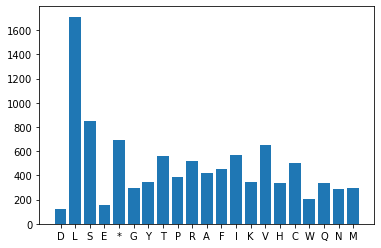

In [ ]:
plt.bar(mers_freq.keys(), mers_freq.values())

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
d=drive.CreateFile({'id':'1hlAal0npfgaIAoPSTQqEqtuxfwIdrmOt'}) # replace the id with id of file you want to access
d.GetContentFile('SARSS.fasta') 

In [ ]:
from Bio import SeqIO
for sequence in SeqIO.parse('SARSS.fasta', "fasta"):
   print(sequence.seq)
print(len(sequence),'nucliotides')

ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAATTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGGTGTCTACTGCTGCCGTGACCATGAGCATGAAATTGCCTGGTTCACTGAGCGCTCTG

In [ ]:
sars = SeqIO.read("SARSS.fasta","fasta")

In [ ]:
sars_seq = sars.seq

In [ ]:
print(sars_seq)

ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTAGCTGTCGCTCGGCTGCATGCCTAGTGCACCTACGCAGTATAAACAATAATAAATTTTACTGTCGTTGACAAGAAACGAGTAACTCGTCCCTCTTCTGCAGACTGCTTACGGTTTCGTCCGTGTTGCAGTCGATCATCAGCATACCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTTCTTGGTGTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTCCTTCAGGTTAGAGACGTGCTAGTGCGTGGCTTCGGGGACTCTGTGGAAGAGGCCCTATCGGAGGCACGTGAACACCTCAAAAATGGCACTTGTGGTCTAGTAGAGCTGGAAAAAGGCGTACTGCCCCAGCTTGAACAGCCCTATGTGTTCATTAAACGTTCTGATGCCTTAAGCACCAATCACGGCCACAAGGTCGTTGAGCTGGTTGCAGAAATGGACGGCATTCAGTACGGTCGTAGCGGTATAACACTGGGAGTACTCGTGCCACATGTGGGCGAAACCCCAATTGCATACCGCAATGTTCTTCTTCGTAAGAACGGTAATAAGGGAGCCGGTGGTCATAGCTATGGCATCGATCTAAAGTCTTATGACTTAGGTGACGAGCTTGGCACTGATCCCATTGAAGATTATGAACAAAACTGGAACACTAAGCATGGCAGTGGTGCACTCCGTGAACTCACTCGTGAGCTCAATGGAGGTGCAGTCACTCGCTATGTCGACAACAATTTCTGTGGCCCAGATGGGTACCCTCTTGATTGCATCAAAGATTTTCTCGCACGCGCGGGCAAGTCAATGTGCACTCTTTCCGAACAACTTGATTACATCGAGTCGAAGAGAGGTGTCTACTGCTGCCGTGACCATGAGCATGAAATTGCCTGGTTCACTGAGCGCTCTG

In [ ]:
print("sars_seq ::",len(sars_seq))

sars_seq :: 29751


In [ ]:
# Check for the GC Content/ Which of them is more heat stable
from Bio.SeqUtils import GC

In [ ]:
print("GC content of sars_seq ::",GC(sars_seq))

GC content of sars_seq :: 40.7616550704178


In [ ]:
sars_protein = sars_seq.translate()

In [ ]:
print("sars_protein ::",len(sars_protein))

sars_protein :: 9917


In [ ]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [ ]:
sars_analysed = ProteinAnalysis(str(sars_protein))

In [ ]:
# Check for the Frequence of AA
sars_analysed.count_amino_acids()

{'A': 575,
 'C': 313,
 'D': 320,
 'E': 365,
 'F': 437,
 'G': 438,
 'H': 298,
 'I': 566,
 'K': 503,
 'L': 1368,
 'M': 365,
 'N': 418,
 'P': 314,
 'Q': 388,
 'R': 417,
 'S': 737,
 'T': 689,
 'V': 683,
 'W': 110,
 'Y': 341}

In [ ]:
# What the freq of Amino Acids
from collections import Counter

In [ ]:
sars_freq = Counter(sars_protein)

In [ ]:
print(sars_freq)

Counter({'L': 1368, 'S': 737, 'T': 689, 'V': 683, 'A': 575, 'I': 566, 'K': 503, 'G': 438, 'F': 437, 'N': 418, 'R': 417, 'Q': 388, 'M': 365, 'E': 365, 'Y': 341, 'D': 320, 'P': 314, 'C': 313, 'H': 298, '*': 272, 'W': 110})


In [ ]:
# Most common amino acid in sars
Counter(sars_protein).most_common(10)

[('L', 1368),
 ('S', 737),
 ('T', 689),
 ('V', 683),
 ('A', 575),
 ('I', 566),
 ('K', 503),
 ('G', 438),
 ('F', 437),
 ('N', 418)]

<BarContainer object of 21 artists>

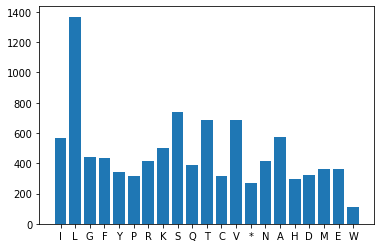

In [ ]:
plt.bar(sars_freq.keys(), sars_freq.values())

In [ ]:

def delta(x,y):
    return 0 if x == y else 1


def M(seq1,seq2,i,j,k):
    return sum(delta(x,y) for x,y in zip(seq1[i:i+k],seq2[j:j+k]))


def makeMatrix(seq1,seq2,k):
    n = len(seq1)
    m = len(seq2)
    return [[M(seq1,seq2,i,j,k) for j in range(m-k+1)] for i in range(n-k+1)]


def plotMatrix(M,t, seq1, seq2, nonblank = chr(0x25A0), blank = ' '):
    print(' |' + seq2)
    print('-'*(2 + len(seq2)))
    for label,row in zip(seq1,M):
        line = ''.join(nonblank if s < t else blank for s in row)
        print(label + '|' + line)


def dotplot(seq1,seq2,k = 1,t = 1):
    M = makeMatrix(seq1,seq2,k)
    plotMatrix(M, t, seq1,seq2) #experiment with character choice

In [ ]:
# Compare Covid and Mers
dotplot(covid_seq[0:50],mers_seq[0:50])

 |GATTTAAGTGAATAGCTTGGCTATCTCACTTCCCCTCGTTCTCTTGCAGA
----------------------------------------------------
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
G|■      ■ ■    ■   ■■                 ■       ■  ■ 
G|■      ■ ■    ■   ■■                 ■       ■  ■ 
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■■     
A| ■   ■■   ■■ ■        ■    ■                   ■ ■
C|               ■    ■   ■ ■ ■  ■■■■ ■   ■ ■   ■   
C|               ■    ■   ■ ■ ■  ■■■■ ■   ■ ■   ■   
T|  ■■■   ■   ■   ■■   ■ ■ ■   ■■    ■  ■■ ■ ■

In [ ]:
dotplot(covid_seq[0:50],sars_seq[0:50])

 |ATATTAGGTTTTTACCTACCCAGGAAAAGCCAACCAACCTCGATCTCTTG
----------------------------------------------------
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
G|      ■■              ■■    ■            ■       ■
G|      ■■              ■■    ■            ■       ■
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
T| ■ ■■   ■■■■■   ■                      ■   ■ ■ ■■ 
A|■ ■  ■       ■   ■   ■  ■■■■   ■■  ■■     ■       
C|              ■■  ■■■        ■■  ■■  ■■ ■   ■ ■   
C|              ■■  ■■■        ■■  ■■  ■■ ■   ■ ■   
T| ■ ■■   ■■■■■   ■                      ■   ■

In [ ]:
def dotplotx(seq1,seq2):
    plt.imshow(np.array(makeMatrix(seq1,seq2,1)))
    # on x-axis list all sequences of seq 2
    xt=plt.xticks(np.arange(len(list(seq2))),list(seq2))
    # on y-axis list all sequences of seq 1
    yt=plt.yticks(np.arange(len(list(seq1))),list(seq1))
    plt.show()

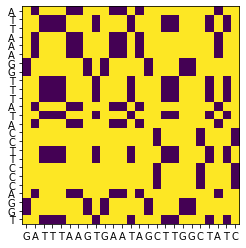

In [ ]:
dotplotx(covid_seq[0:25],mers_seq[0:25])

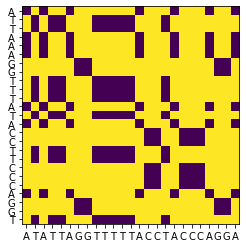

In [ ]:
dotplotx(covid_seq[0:25],sars_seq[0:25])